In [178]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/ananyarajesh/Desktop/MLC_Data/FINALFINAL/mergedregressors.csv')
df

,NTAName,Population,Weighted Median Income,Below Poverty Line %,EAPop,Bachelor degree,Total,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD,Total_NYPD_Complaints,avg_compound_score,norm_compound_score
0,Allerton,3117.473684,62141.291295,24.602712,29883,7.867349,62155,14.763092,38.169093,0.109404,4.709195,0.008044,0.933151,2.067412,39.240608,2.700146,0.061975,-0.354033,0.583604
1,Alley Pond Park,4118.636364,107518.289372,7.142857,39,0.000000,90,65.555556,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,24.444444,1.627803,0.769231,-0.355994,0.578725
2,Annadale-Huguenot-Prince's Bay-Woodrow,5090.315789,126245.529571,5.965246,35230,15.509509,53872,72.772498,7.441714,0.252450,8.438521,0.000000,1.020939,1.522127,8.551752,0.235762,0.022169,-0.388880,0.496901
3,Arden Heights-Rossville,4266.533333,123022.836526,4.344109,5547,11.934379,30539,75.487082,0.533744,0.065490,7.881725,0.088412,0.160451,0.887390,14.895707,0.627650,0.076438,-0.402048,0.464138
4,Astoria (Central),3012.892857,99753.770961,10.717382,46478,31.552563,129518,48.189441,12.619868,0.175265,9.288284,0.006949,0.413842,2.672988,26.633364,2.017487,0.037071,-0.325044,0.655731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Williamsbridge-Olinville,3314.289474,57061.063497,21.040350,57664,8.546060,114951,16.928952,48.229246,0.474985,9.212621,0.156588,0.718567,2.015641,22.263399,1.173722,0.067234,-0.359912,0.568977
189,Williamsburg,4570.125000,119312.391337,15.759915,57774,29.705404,94307,47.328406,2.397489,0.010604,9.308959,0.033932,0.311748,3.087788,37.521075,1.473846,0.050161,-0.295750,0.728616
190,Windsor Terrace-South Slope,2884.850000,142219.077040,7.881956,14065,24.464984,51440,66.121695,5.223561,0.000000,9.758942,0.000000,0.573484,3.339813,14.982504,2.778086,0.035691,-0.369984,0.543916
191,Woodhaven,2885.523810,74809.918179,9.869708,40462,12.574762,114909,16.999539,7.339721,0.462975,31.157699,0.000000,0.865903,1.610840,41.563324,1.792787,0.027334,-0.420834,0.417397


In [179]:
df.columns

Index(['NTAName', 'Population', 'Weighted Median Income',
       'Below Poverty Line %', 'EAPop', 'Bachelor degree', 'Total',
       'White, not hispanic', 'Black or African American, not hispanic',
       'American Indian and Alaska Native, not hispanic',
       'Asain, not hispanic',
       'Native Hawaiian and Other Pacific Islander, not hispanic',
       'Some other race alone, not hispanic',
       'Two or More Races, not hispanic', 'Hispanic or Latino', 'NormalizedSD',
       'Total_NYPD_Complaints', 'avg_compound_score', 'norm_compound_score'],
      dtype='object')

In [180]:
df = df.drop(['Population', 'EAPop', 'Total'], axis=1)
df

,NTAName,Weighted Median Income,Below Poverty Line %,Bachelor degree,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD,Total_NYPD_Complaints,avg_compound_score,norm_compound_score
0,Allerton,62141.291295,24.602712,7.867349,14.763092,38.169093,0.109404,4.709195,0.008044,0.933151,2.067412,39.240608,2.700146,0.061975,-0.354033,0.583604
1,Alley Pond Park,107518.289372,7.142857,0.000000,65.555556,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,24.444444,1.627803,0.769231,-0.355994,0.578725
2,Annadale-Huguenot-Prince's Bay-Woodrow,126245.529571,5.965246,15.509509,72.772498,7.441714,0.252450,8.438521,0.000000,1.020939,1.522127,8.551752,0.235762,0.022169,-0.388880,0.496901
3,Arden Heights-Rossville,123022.836526,4.344109,11.934379,75.487082,0.533744,0.065490,7.881725,0.088412,0.160451,0.887390,14.895707,0.627650,0.076438,-0.402048,0.464138
4,Astoria (Central),99753.770961,10.717382,31.552563,48.189441,12.619868,0.175265,9.288284,0.006949,0.413842,2.672988,26.633364,2.017487,0.037071,-0.325044,0.655731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Williamsbridge-Olinville,57061.063497,21.040350,8.546060,16.928952,48.229246,0.474985,9.212621,0.156588,0.718567,2.015641,22.263399,1.173722,0.067234,-0.359912,0.568977
189,Williamsburg,119312.391337,15.759915,29.705404,47.328406,2.397489,0.010604,9.308959,0.033932,0.311748,3.087788,37.521075,1.473846,0.050161,-0.295750,0.728616
190,Windsor Terrace-South Slope,142219.077040,7.881956,24.464984,66.121695,5.223561,0.000000,9.758942,0.000000,0.573484,3.339813,14.982504,2.778086,0.035691,-0.369984,0.543916
191,Woodhaven,74809.918179,9.869708,12.574762,16.999539,7.339721,0.462975,31.157699,0.000000,0.865903,1.610840,41.563324,1.792787,0.027334,-0.420834,0.417397


In [181]:
df.columns

Index(['NTAName', 'Weighted Median Income', 'Below Poverty Line %',
       'Bachelor degree', 'White, not hispanic',
       'Black or African American, not hispanic',
       'American Indian and Alaska Native, not hispanic',
       'Asain, not hispanic',
       'Native Hawaiian and Other Pacific Islander, not hispanic',
       'Some other race alone, not hispanic',
       'Two or More Races, not hispanic', 'Hispanic or Latino', 'NormalizedSD',
       'Total_NYPD_Complaints', 'avg_compound_score', 'norm_compound_score'],
      dtype='object')

In [182]:
print(df.dtypes)

NTAName                                                      object
Weighted Median Income                                      float64
Below Poverty Line %                                        float64
Bachelor degree                                             float64
White, not hispanic                                         float64
Black or African American, not hispanic                     float64
American Indian and Alaska Native, not hispanic             float64
Asain, not hispanic                                         float64
Native Hawaiian and Other Pacific Islander, not hispanic    float64
Some other race alone, not hispanic                         float64
Two or More Races, not hispanic                             float64
Hispanic or Latino                                          float64
NormalizedSD                                                float64
Total_NYPD_Complaints                                       float64
avg_compound_score                              

In [183]:
df = df.dropna()

In [184]:
df

,NTAName,Weighted Median Income,Below Poverty Line %,Bachelor degree,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD,Total_NYPD_Complaints,avg_compound_score,norm_compound_score
0,Allerton,62141.291295,24.602712,7.867349,14.763092,38.169093,0.109404,4.709195,0.008044,0.933151,2.067412,39.240608,2.700146,0.061975,-0.354033,0.583604
1,Alley Pond Park,107518.289372,7.142857,0.000000,65.555556,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,24.444444,1.627803,0.769231,-0.355994,0.578725
2,Annadale-Huguenot-Prince's Bay-Woodrow,126245.529571,5.965246,15.509509,72.772498,7.441714,0.252450,8.438521,0.000000,1.020939,1.522127,8.551752,0.235762,0.022169,-0.388880,0.496901
3,Arden Heights-Rossville,123022.836526,4.344109,11.934379,75.487082,0.533744,0.065490,7.881725,0.088412,0.160451,0.887390,14.895707,0.627650,0.076438,-0.402048,0.464138
4,Astoria (Central),99753.770961,10.717382,31.552563,48.189441,12.619868,0.175265,9.288284,0.006949,0.413842,2.672988,26.633364,2.017487,0.037071,-0.325044,0.655731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Williamsbridge-Olinville,57061.063497,21.040350,8.546060,16.928952,48.229246,0.474985,9.212621,0.156588,0.718567,2.015641,22.263399,1.173722,0.067234,-0.359912,0.568977
189,Williamsburg,119312.391337,15.759915,29.705404,47.328406,2.397489,0.010604,9.308959,0.033932,0.311748,3.087788,37.521075,1.473846,0.050161,-0.295750,0.728616
190,Windsor Terrace-South Slope,142219.077040,7.881956,24.464984,66.121695,5.223561,0.000000,9.758942,0.000000,0.573484,3.339813,14.982504,2.778086,0.035691,-0.369984,0.543916
191,Woodhaven,74809.918179,9.869708,12.574762,16.999539,7.339721,0.462975,31.157699,0.000000,0.865903,1.610840,41.563324,1.792787,0.027334,-0.420834,0.417397


In [185]:
features = ['Weighted Median Income', 'Below Poverty Line %',
       'Bachelor degree', 'White, not hispanic',
       'Black or African American, not hispanic',
       'American Indian and Alaska Native, not hispanic',
       'Asain, not hispanic',
       'Native Hawaiian and Other Pacific Islander, not hispanic',
       'Some other race alone, not hispanic',
       'Two or More Races, not hispanic', 'Hispanic or Latino', 'NormalizedSD',
       'Total_NYPD_Complaints']

target = ['norm_compound_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [186]:
# Convert continuous labels to categorical labels based on quantiles
y_train_cat = pd.qcut(y_train.values.ravel(), q=3, labels=False)

# Convert continuous labels to categorical labels based on quantiles
y_test_cat = pd.qcut(y_test.values.ravel(), q=3, labels=False)

In [187]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Fit the decision tree on the scaled training data
clf.fit(X_train_scaled, y_train_cat)

# Evaluate the performance of the decision tree on the scaled testing data
score = clf.score(X_test_scaled, y_test_cat)

print("Accuracy:", score)

Accuracy: 0.46153846153846156


In [188]:
# Create decision tree regression object
regressor = DecisionTreeRegressor(random_state=42)

# Train the regression model on the training data
regressor.fit(X_train, y_train_cat)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test_cat, y_pred)
r2 = r2_score(y_test_cat, y_pred)
print('Mean squared error:', mse)
print('R-squared score:', r2)

Mean squared error: 0.5128205128205128
R-squared score: 0.23076923076923073


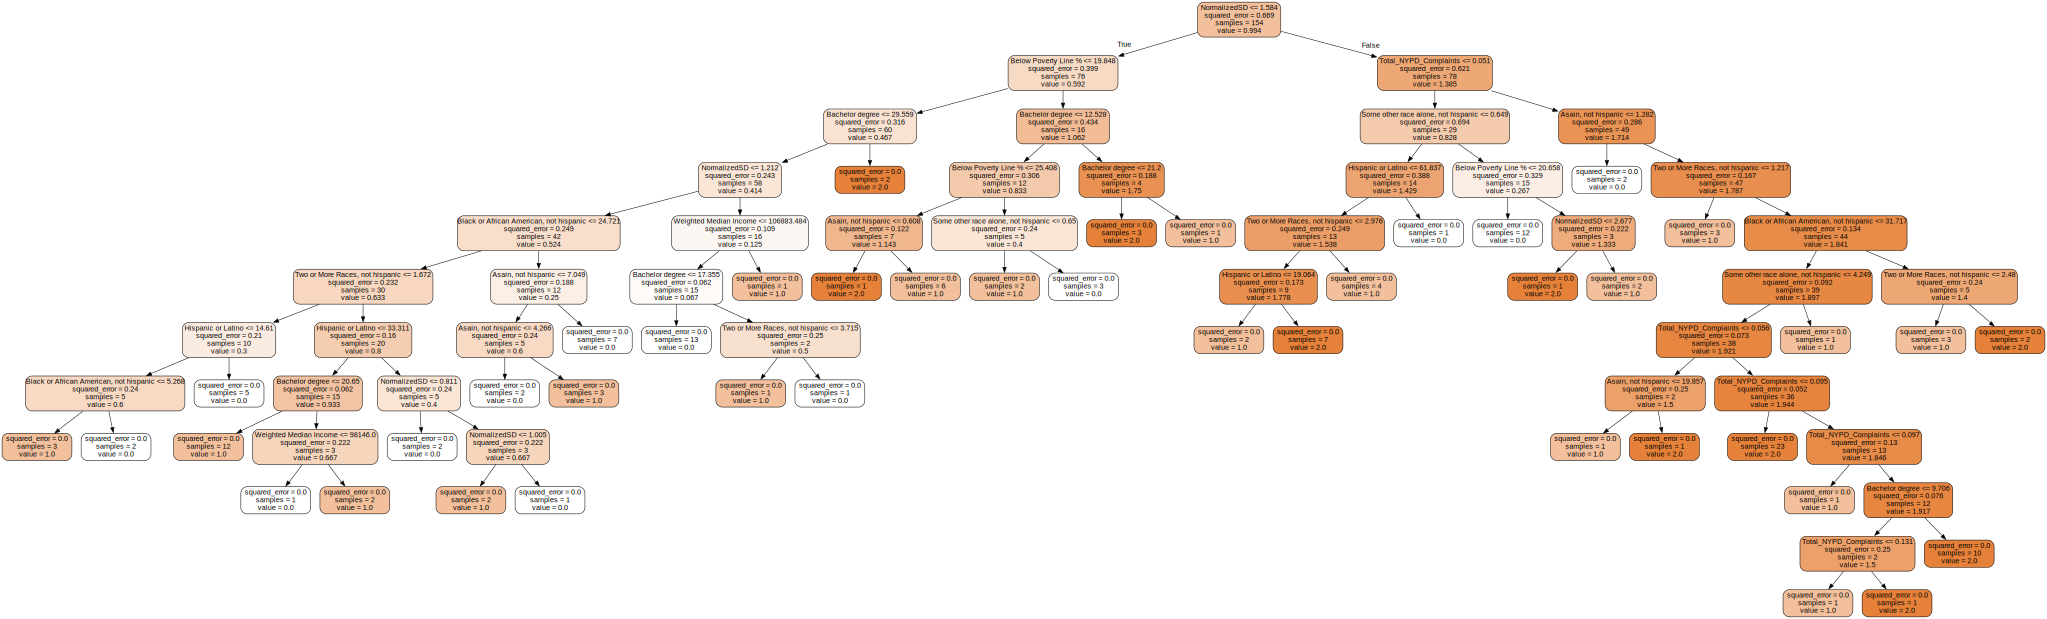

In [189]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=df[features].columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
#graph.render("decision_tree")
graph

In [190]:
import statsmodels.api as sm
X = df[['Weighted Median Income', 'Below Poverty Line %', 'Bachelor degree',
        'White, not hispanic', 'Black or African American, not hispanic',
        'American Indian and Alaska Native, not hispanic', 'Asain, not hispanic',
        'Native Hawaiian and Other Pacific Islander, not hispanic',
        'Some other race alone, not hispanic', 'Two or More Races, not hispanic',
        'Hispanic or Latino', 'NormalizedSD', 'Total_NYPD_Complaints']]

y = df['norm_compound_score']

# add a constant term to X to represent the intercept
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     norm_compound_score   R-squared:                       0.437
Model:                             OLS   Adj. R-squared:                  0.399
Method:                  Least Squares   F-statistic:                     11.63
Date:                 Thu, 04 May 2023   Prob (F-statistic):           3.68e-17
Time:                         16:40:28   Log-Likelihood:                 153.61
No. Observations:                  193   AIC:                            -281.2
Df Residuals:                      180   BIC:                            -238.8
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [191]:
from sklearn.model_selection import GridSearchCV

# Define a range of possible max depths
max_depths = range(1, 11)

# Create a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Create a dictionary of hyperparameters to search over
param_grid = {'max_depth': max_depths}

# Create a grid search object
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train_cat)

# Print the best hyperparameters and score
print("Best max depth:", grid_search.best_params_['max_depth'])
print("Best score:", grid_search.best_score_)

Best max depth: 5
Best score: 0.5062365591397849


In [192]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['mse', 'mae']
}

# Create a decision tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(
    dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train_cat)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

Best hyperparameters: {'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


ng: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. U

In [201]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor with the best hyperparameters
dtree = DecisionTreeRegressor(criterion='mse', max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2)

# Train the model using the training data
dtree.fit(X_train, y_train_cat)

# Predict the target values for the test data
y_pred = dtree.predict(X_test)

# Calculate the out-of-sample mean squared error
mse = mean_squared_error(y_test_cat, y_pred)

# Calculate the out-of-sample R-squared score
r2 = r2_score(y_test_cat, y_pred)

# Print the model evaluation metrics
print('Mean squared error:', mse)
print('R-squared score:', r2)

Mean squared error: 0.2903328753575302
R-squared score: 0.5645006869637047


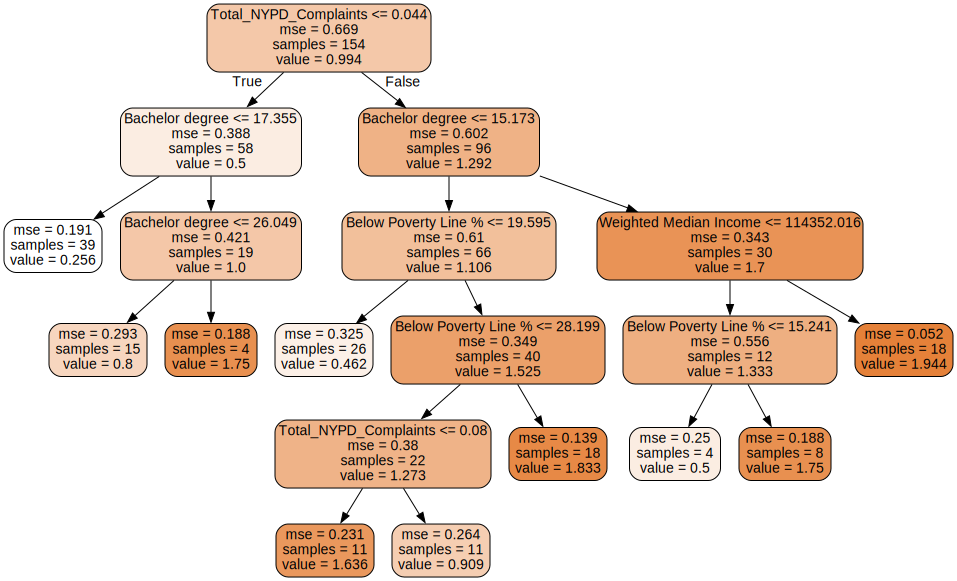

In [202]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=df[features].columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
#graph.render("dt3")
graph

In [207]:
features = ['Weighted Median Income', 'Below Poverty Line %', 'Bachelor degree', 'Total_NYPD_Complaints']

target = ['norm_compound_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [208]:
# Convert continuous labels to categorical labels based on quantiles
y_train_cat = pd.qcut(y_train.values.ravel(), q=3, labels=False)

# Convert continuous labels to categorical labels based on quantiles
y_test_cat = pd.qcut(y_test.values.ravel(), q=3, labels=False)

In [209]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Fit the decision tree on the scaled training data
clf.fit(X_train_scaled, y_train_cat)

# Evaluate the performance of the decision tree on the scaled testing data
score = clf.score(X_test_scaled, y_test_cat)

print("Accuracy:", score)

Accuracy: 0.6153846153846154


In [210]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['mse', 'mae']
}

# Create a decision tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(
    dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train_cat)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

Best hyperparameters: {'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarni

In [211]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor with the best hyperparameters
dtree = DecisionTreeRegressor(criterion='mse', max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2)

# Train the model using the training data
dtree.fit(X_train, y_train_cat)

# Predict the target values for the test data
y_pred = dtree.predict(X_test)

# Calculate the out-of-sample mean squared error
mse = mean_squared_error(y_test_cat, y_pred)

# Calculate the out-of-sample R-squared score
r2 = r2_score(y_test_cat, y_pred)

# Print the model evaluation metrics
print('Mean squared error:', mse)
print('R-squared score:', r2)

Mean squared error: 0.46131581320005877
R-squared score: 0.30802628019991185


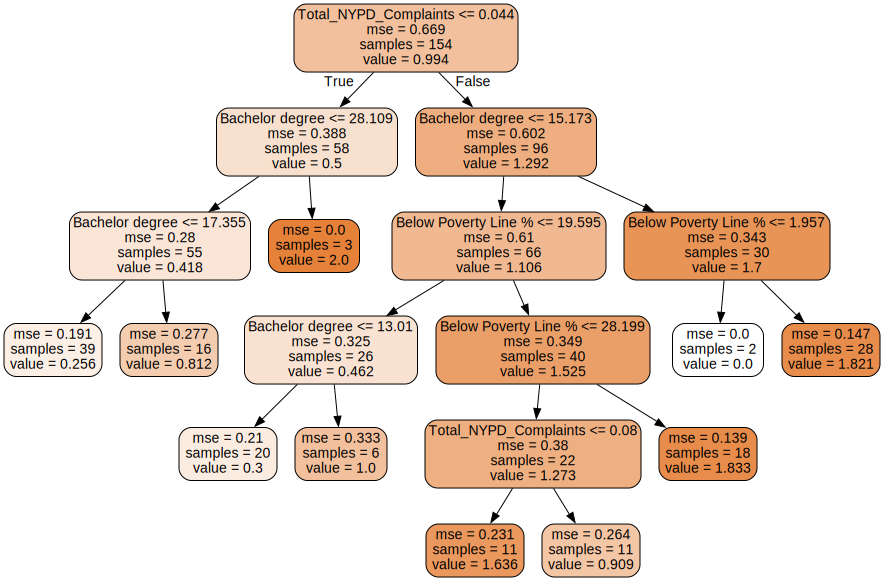

In [212]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=df[features].columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
#graph.render("dt3")
graph

In [213]:
features = ['Weighted Median Income', 'Below Poverty Line %', 'Bachelor degree', 'Total_NYPD_Complaints']

target = ['avg_compound_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [214]:
# Convert continuous labels to categorical labels based on quantiles
y_train_cat = pd.qcut(y_train.values.ravel(), q=3, labels=False)

# Convert continuous labels to categorical labels based on quantiles
y_test_cat = pd.qcut(y_test.values.ravel(), q=3, labels=False)

In [215]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Fit the decision tree on the scaled training data
clf.fit(X_train_scaled, y_train_cat)

# Evaluate the performance of the decision tree on the scaled testing data
score = clf.score(X_test_scaled, y_test_cat)

print("Accuracy:", score)

Accuracy: 0.6153846153846154


In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['mse', 'mae']
}

# Create a decision tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(
    dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train_cat)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: 

Best hyperparameters: {'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarni

In [217]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor with the best hyperparameters
dtree = DecisionTreeRegressor(criterion='mse', max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2)

# Train the model using the training data
dtree.fit(X_train, y_train_cat)

# Predict the target values for the test data
y_pred = dtree.predict(X_test)

# Calculate the out-of-sample mean squared error
mse = mean_squared_error(y_test_cat, y_pred)

# Calculate the out-of-sample R-squared score
r2 = r2_score(y_test_cat, y_pred)

# Print the model evaluation metrics
print('Mean squared error:', mse)
print('R-squared score:', r2)

Mean squared error: 0.46131581320005877
R-squared score: 0.30802628019991185


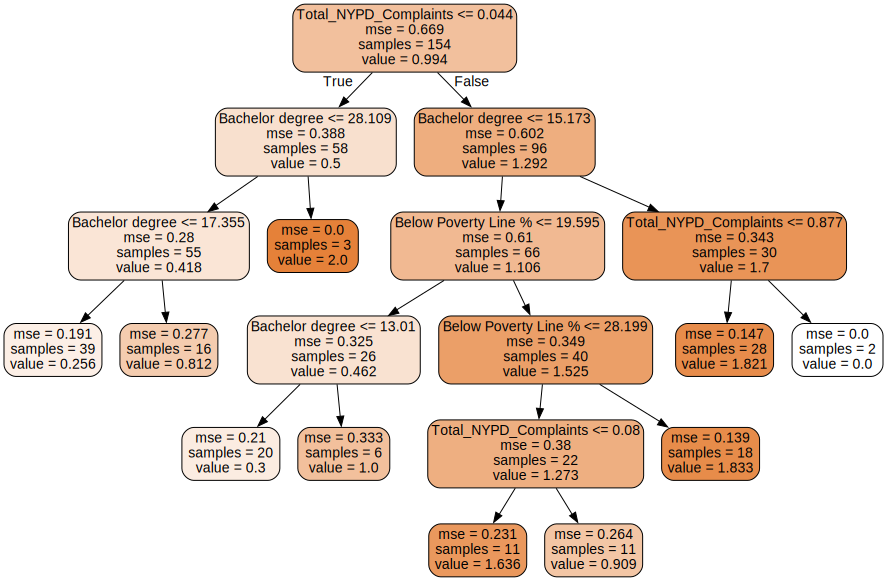

In [218]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=df[features].columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
#graph.render("dt3")
graph